<a href="https://colab.research.google.com/github/Marxie-ops/crude_oil_web_hosting_via-ngrok/blob/main/Crude_Oil_Prices_Forecasting_web_hosting_via_ngrok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TIMESERIES & FORECASTING PROJECT**

In [ ]:
!pip install yfinance

In [ ]:
!pip install tensorflow.keras

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## **Data Extraction**

In [2]:
crude_oil = yf.Ticker("CL=F")

In [3]:
crude_oil_df = crude_oil.history(period="10y")  # Last 10 years

In [4]:
print(crude_oil_df.head() )

                                Open       High        Low      Close  Volume  \
Date                                                                            
2014-12-22 00:00:00-05:00  57.750000  58.529999  55.130001  55.259998  277319   
2014-12-23 00:00:00-05:00  55.389999  57.560001  55.060001  57.119999  274003   
2014-12-24 00:00:00-05:00  56.799999  57.150002  55.070000  55.840000  174969   
2014-12-26 00:00:00-05:00  55.860001  56.590000  54.509998  54.730000  127202   
2014-12-29 00:00:00-05:00  55.049999  55.740002  52.900002  53.610001  241378   

                           Dividends  Stock Splits  
Date                                                
2014-12-22 00:00:00-05:00        0.0           0.0  
2014-12-23 00:00:00-05:00        0.0           0.0  
2014-12-24 00:00:00-05:00        0.0           0.0  
2014-12-26 00:00:00-05:00        0.0           0.0  
2014-12-29 00:00:00-05:00        0.0           0.0  


In [ ]:
crude_oil_df.reset_index(inplace=True)

In [5]:
crude_oil_df .head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-12-22 00:00:00-05:00,57.750000,58.529999,55.130001,55.259998,277319,0.0,0.0
2014-12-23 00:00:00-05:00,55.389999,57.560001,55.060001,57.119999,274003,0.0,0.0
2014-12-24 00:00:00-05:00,56.799999,57.150002,55.070000,55.840000,174969,0.0,0.0
2014-12-26 00:00:00-05:00,55.860001,56.590000,54.509998,54.730000,127202,0.0,0.0
2014-12-29 00:00:00-05:00,55.049999,55.740002,52.900002,53.610001,241378,0.0,0.0


## ***Data Cleaning & Exploratory Data Analysis (EDA)***

In [6]:
crude_oil_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2014-12-22 00:00:00-05:00 to 2024-12-20 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2515 non-null   float64
 1   High          2515 non-null   float64
 2   Low           2515 non-null   float64
 3   Close         2515 non-null   float64
 4   Volume        2515 non-null   int64  
 5   Dividends     2515 non-null   float64
 6   Stock Splits  2515 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.2 KB


In [7]:
crude_oil_df .shape

(2515, 7)

In [8]:
print(crude_oil_df ['Dividends'].isna().sum())
print(crude_oil_df ['Stock Splits'].isna().sum())

0
0


In [9]:
crude_oil_df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [10]:
crude_oil_df.duplicated().sum()

0

In [11]:
crude_oil_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2515.000000,2515.000000,2515.000000,2515.000000,2.515000e+03,2515.0,2515.0
mean,61.997455,63.065698,60.850815,61.961563,4.623603e+05,0.0,0.0
std,18.077830,18.323844,17.839460,18.111957,2.162127e+05,0.0,0.0
min,-14.000000,13.690000,-40.320000,-37.630001,0.000000e+00,0.0,0.0
25%,48.594999,49.315001,47.750000,48.520000,3.152830e+05,0.0,0.0
50%,59.790001,60.740002,58.820000,59.770000,4.227560e+05,0.0,0.0
75%,74.049999,75.250000,72.910000,74.010002,6.008575e+05,0.0,0.0
max,124.660004,130.500000,120.790001,123.699997,2.288230e+06,0.0,0.0


In [12]:
crude_oil_df = crude_oil_df.drop(columns=['Dividends',	'Stock Splits'])

In [18]:
df = crude_oil_df.copy()
df

,Open,High,Low,Close,Volume
Date,,,,,
2014-12-22 00:00:00-05:00,57.750000,58.529999,55.130001,55.259998,277319
2014-12-23 00:00:00-05:00,55.389999,57.560001,55.060001,57.119999,274003
2014-12-24 00:00:00-05:00,56.799999,57.150002,55.070000,55.840000,174969
2014-12-26 00:00:00-05:00,55.860001,56.590000,54.509998,54.730000,127202
2014-12-29 00:00:00-05:00,55.049999,55.740002,52.900002,53.610001,241378
...,...,...,...,...,...
2024-12-16 00:00:00-05:00,71.440002,71.440002,70.370003,70.709999,204296
2024-12-17 00:00:00-05:00,70.610001,70.919998,69.180000,70.080002,99604
2024-12-18 00:00:00-05:00,70.220001,71.379997,69.989998,70.580002,99386


In [14]:
correlation_matrix = df.select_dtypes(['float64','int64']).corr()
correlation_matrix

,Open,High,Low,Close,Volume
Open,1.000000,0.998122,0.995879,0.994345,-0.337003
High,0.998122,1.000000,0.994873,0.996242,-0.328888
Low,0.995879,0.994873,1.000000,0.998212,-0.341861
Close,0.994345,0.996242,0.998212,1.000000,-0.335468
Volume,-0.337003,-0.328888,-0.341861,-0.335468,1.000000


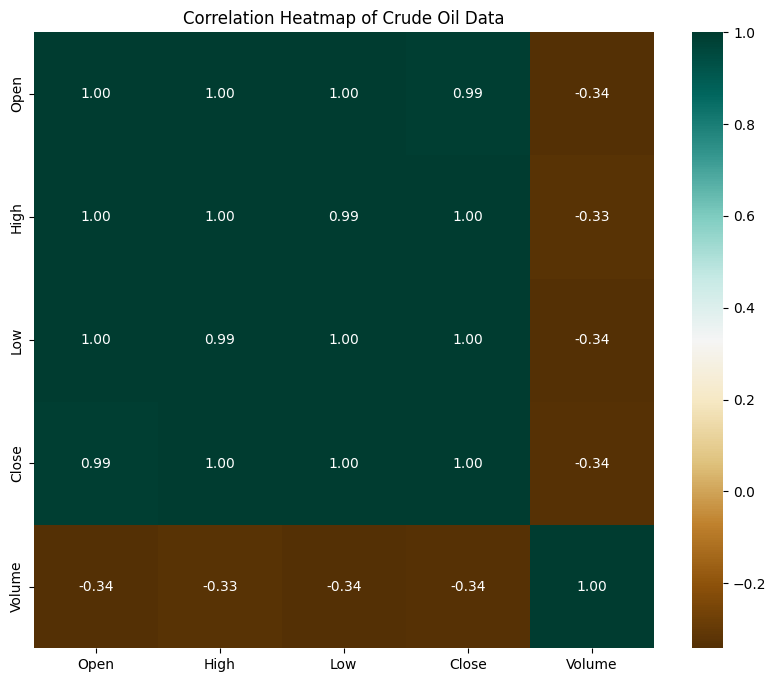

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="BrBG", fmt=".2f")
plt.title("Correlation Heatmap of Crude Oil Data")
plt.show()

**Observations from the Heatmap:**

**Open, High, Low, and Close Prices:**

These variables exhibit very strong positive correlations with each other. This is expected, as they are all related to the price of crude oil at different points in time.
The correlation coefficients are close to 1, indicating a near-perfect positive relationship.
Volume:

Volume has a moderate negative correlation with Open, High, Low, and Close prices. This suggests that as the price of crude oil increases, the trading volume tends to decrease slightly. However, the correlation is not very strong.

**Overall**, the heatmap reveals that the crude oil data exhibits strong correlations among the price variables (Open, High, Low, Close), and a moderate negative correlation between volume and price.

In [19]:
data = df[['Close','Volume']]

In [20]:
data.head()

,Close,Volume
Date,,
2014-12-22 00:00:00-05:00,55.259998,277319
2014-12-23 00:00:00-05:00,57.119999,274003
2014-12-24 00:00:00-05:00,55.840000,174969
2014-12-26 00:00:00-05:00,54.730000,127202
2014-12-29 00:00:00-05:00,53.610001,241378


In [21]:
data.describe()

,Close,Volume
count,2515.000000,2.515000e+03
mean,61.961563,4.623603e+05
std,18.111957,2.162127e+05
min,-37.630001,0.000000e+00
25%,48.520000,3.152830e+05
50%,59.770000,4.227560e+05
75%,74.010002,6.008575e+05
max,123.699997,2.288230e+06


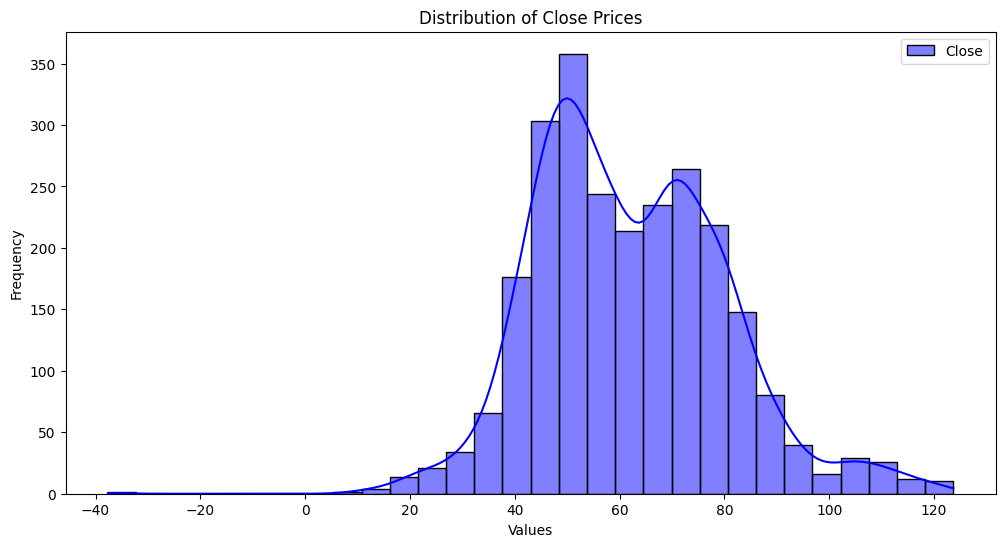

In [22]:

plt.figure(figsize=(12, 6))
sns.histplot(data['Close'], kde=True, color='blue', bins=30, label='Close')


# Add labels, title, and legend
plt.title("Distribution of Close Prices")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()



In [23]:
from scipy.stats import skew, kurtosis
print("Close Skewness:",data['Close'].skew())
print("Close Kurtosis:",data['Close'].kurtosis())

print("Volume Skewness:",data['Volume'].skew())
print("Volume Kurtosis:",data['Volume'].kurtosis())



Close Skewness: 0.3755946666612674
Close Kurtosis: 0.5334745012146178
Volume Skewness: 0.8674054329992136
Volume Kurtosis: 2.5891560948440557


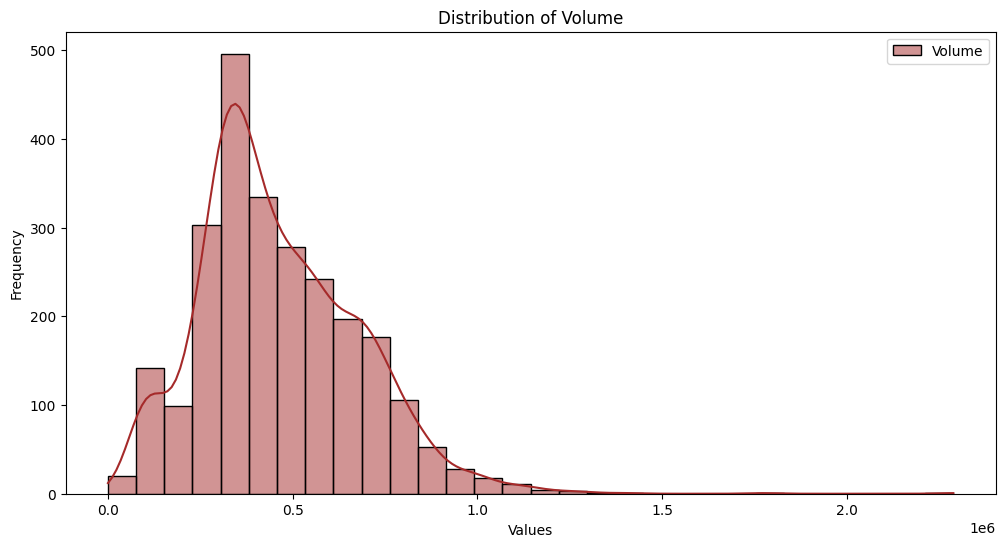

In [24]:
plt.figure(figsize=(12, 6))

sns.histplot(data['Volume'], kde=True, color= 'brown', bins=30, label='Volume')

# Add labels, title, and legend
plt.title("Distribution of Volume")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()

# Show the plot
plt.show()

*Distribution is not normal, hence will consider models that are robust to outliers like Prophet using Bayesian Approach.*

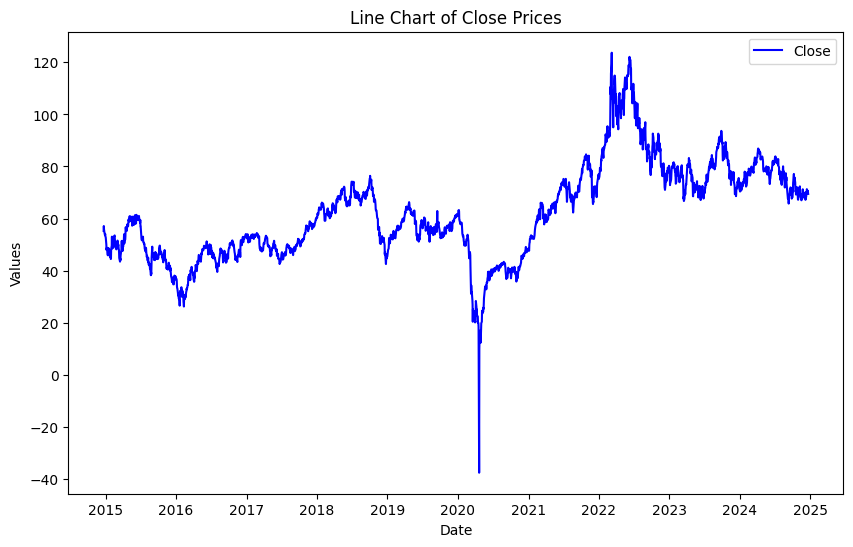

In [26]:

plt.figure(figsize=(10, 6))


plt.plot(data.index,data['Close'], label='Close', color='blue')


# Add title and labels
plt.title("Line Chart of Close Prices")
plt.xlabel("Date")
plt.ylabel("Values")

# Add legend
plt.legend()

# Display the plot
plt.show()


**Overall Trend:**

The chart displays a general upward trend in close prices over the years from 2015 to 2024. There are periods of fluctuations and corrections, but the overall direction is positive.

Volatility:

The chart exhibits significant volatility, with periods of sharp price increases and decreases. This suggests a dynamic market with frequent price swings.

* **Key Observations:**

**2015-2018:** The initial period shows a relatively stable price range with some fluctuations.

**2018-2019:** A notable price decline occurs, potentially indicating a market downturn or correction.

**2019-2020:** A sharp recovery and subsequent rise in prices are observed, suggesting a bullish market sentiment.

**2020-2021:** A significant price spike occurs, possibly due to specific market events or economic factors.Possibly because of Covid-19 Pandemic

**2021-2024:** The price range stabilizes with some fluctuations, indicating a more balanced market.
Possible Interpretations:

Some possible explanations for the observed patterns could include:

**External Shocks**: Unexpected events like geopolitical tensions, natural disasters, or pandemics can cause significant price fluctuations.

*The sharp spike in 2020 is indeed attributed to the COVID-19 pandemic.*

Here's why:

* Global Lockdowns and Reduced Demand:

The pandemic led to widespread lockdowns and restrictions on travel and economic activity.
This significantly reduced global demand for oil as transportation, manufacturing, and other industries slowed down.
* Oil Price War:

A price war between Saudi Arabia and Russia further exacerbated the situation. Both countries increased oil production, flooding the market with excess supply.
This led to a historic drop in oil prices, including negative prices for a brief period.
* Market Uncertainty:

The pandemic created significant uncertainty in the global economy, leading to increased volatility in oil prices.
Therefore, the combination of reduced demand and oversupply due to the pandemic and the oil price war resulted in the dramatic spike seen in the chart.


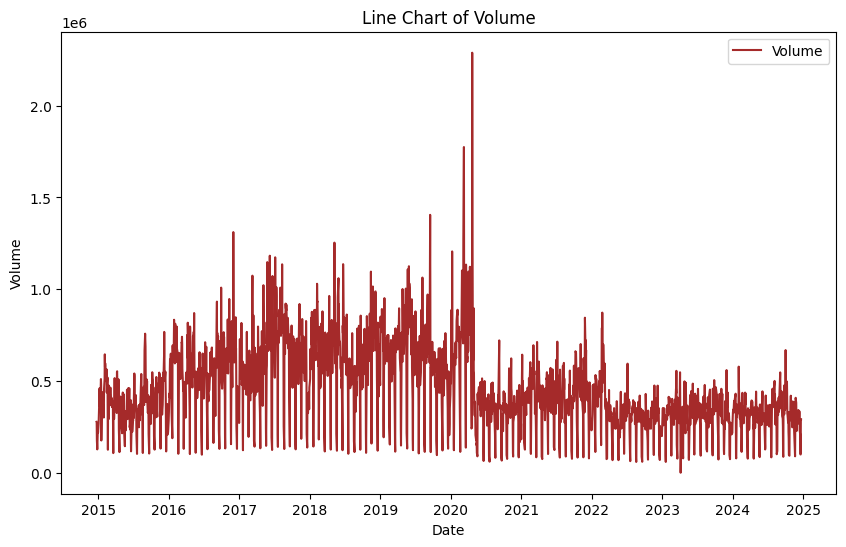

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Volume'], label='Volume', color='brown')
plt.title("Line Chart of Volume")
plt.xlabel("Date")
plt.ylabel("Volume")

# Add legend
plt.legend()

# Display the plot
plt.show()

**Overall Trend:**

The chart displays a general upward trend in volume over the years from 2015 to 2024. There are periods of fluctuations and spikes, but the overall direction is going down.

**Volatility:**

The chart exhibits significant volatility, with periods of high volume and low volume. This suggests a dynamic market with varying levels of trading activity.

* **Key Observations:**

**2015-2018**: The initial period shows a relatively stable volume range with some fluctuations.

**2018-2019**: A notable increase in volume occurs, indicating increased market activity.

**2019-2020:** A significant spike in volume is observed, likely related to increased market volatility during the COVID-19 pandemic.

**2020-2021:** A period of high volume persists, possibly due to continued market uncertainty and increased trading activity.

**2021-2024:** The volume stabilizes with some fluctuations, suggesting a more balanced market.
Some possible explanations for the observed patterns could include:

* Market Sentiment: Increased market volatility and uncertainty can lead to higher trading volumes as investors react to news and events.
* Economic Factors: Changes in economic conditions, such as interest rates or GDP growth, can influence trading activity.
*Industry-Specific Factors: Events or trends within the specific industry can impact trading volume.

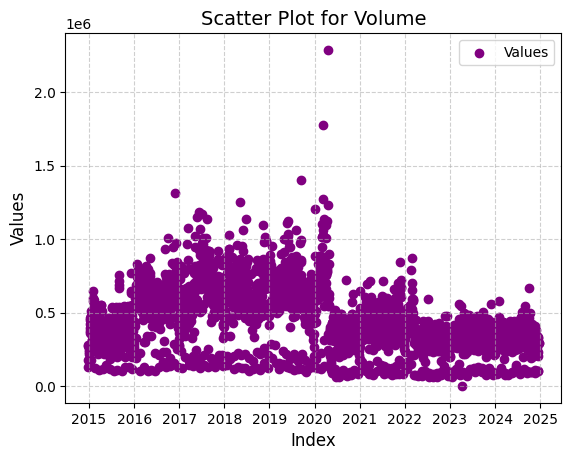

In [28]:
# Scatter plot of one column
plt.scatter(data.index, data['Volume'], color='purple', marker='o', label='Values')
# Add titles and labels
plt.title('Scatter Plot for Volume', fontsize=14)
plt.xlabel('Index', fontsize=12)  # X-axis as indices
plt.ylabel('Values', fontsize=12)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show plot
plt.show()

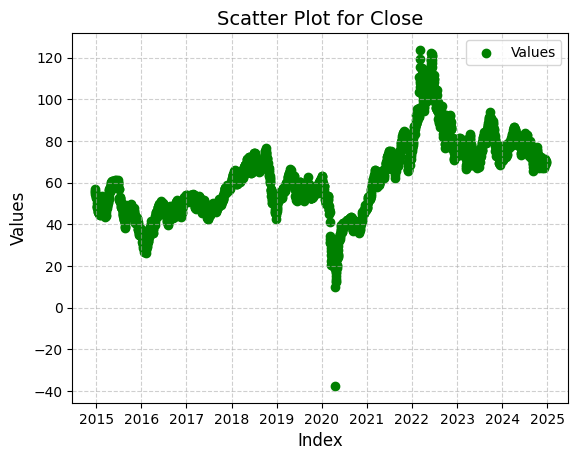

In [29]:
plt.scatter(data.index, data['Close'], color='green', marker='o', label='Values')

# Add titles and labels
plt.title('Scatter Plot for Close', fontsize=14)
plt.xlabel('Index', fontsize=12)  # X-axis as indices
plt.ylabel('Values', fontsize=12)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Show plot
plt.show()

## ***Removing Outliers***

Original data size: 2515
Cleaned data size: 2483
Number of outliers removed: 32


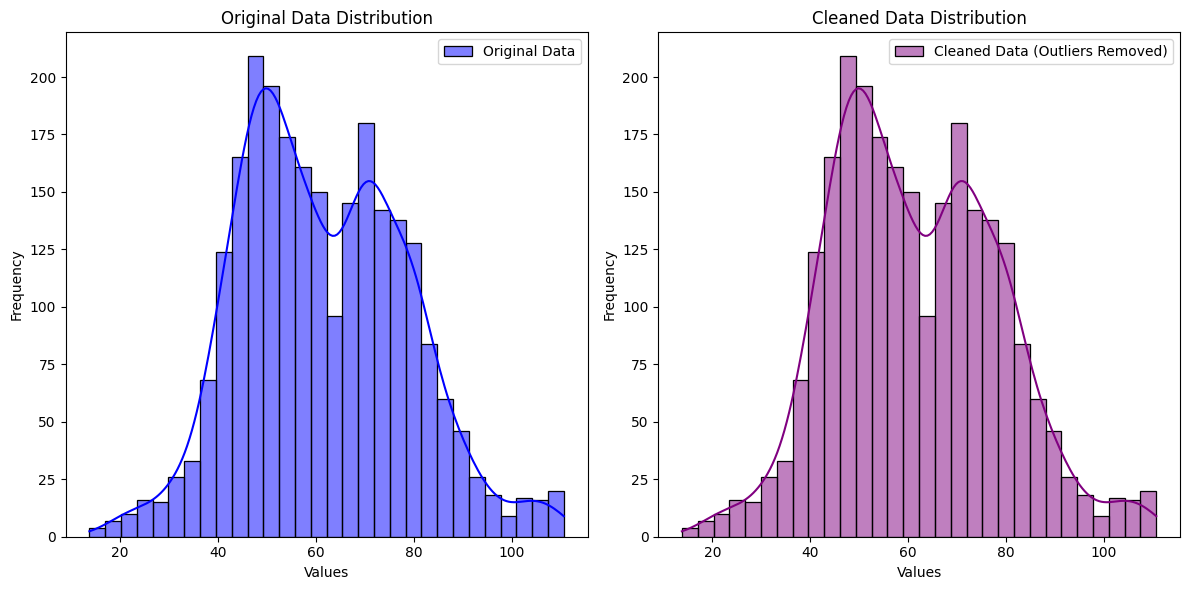

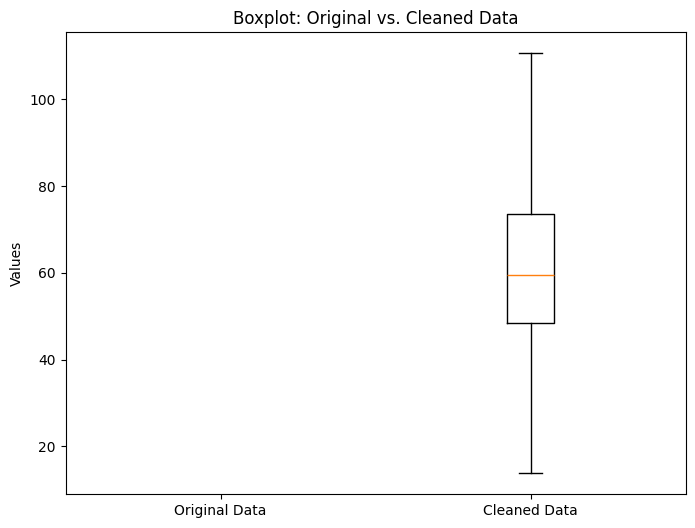

In [30]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame and 'Close' is the relevant column
values = data['Close']

# Calculate mean and standard deviation
mean = values.mean()
std_dev = values.std()

# Calculate z-scores
z_scores = (values - mean) / std_dev

# Define threshold for outliers
threshold = 2.7

# Remove outliers
cleaned_close = values[np.abs(z_scores) <= threshold]

# Apply outlier cleaning logic
data.loc[:, 'Close'] = values.where(np.abs(z_scores) <= threshold)

# Print the number of removed and retained data points
print(f"Original data size: {len(values)}")
print(f"Cleaned data size: {len(cleaned_close)}")
print(f"Number of outliers removed: {len(values) - len(cleaned_close)}")

# Visualize the data
plt.figure(figsize=(12, 6))

# Original data histogram
plt.subplot(1, 2, 1)
sns.histplot(values, bins=30, kde=True, color='blue', label='Original Data')
plt.title('Original Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

# Cleaned data histogram
plt.subplot(1, 2, 2)
sns.histplot(cleaned_close, bins=30, kde= True, color='purple', label='Cleaned Data (Outliers Removed)')
plt.title('Cleaned Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Boxplot for further visualization
plt.figure(figsize=(8, 6))
plt.boxplot([values, cleaned_close], labels=['Original Data', 'Cleaned Data'])
plt.title('Boxplot: Original vs. Cleaned Data')
plt.ylabel('Values')
plt.show()


<ipython-input-31-4f2da1e27375>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[277319. 274003. 174969. ...  99386. 291660. 291660.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:, 'Volume'] = values1.where(np.abs(z_scores) <= threshold)


Original data size: 2515
Cleaned data size: 2487
Number of outliers removed: 28


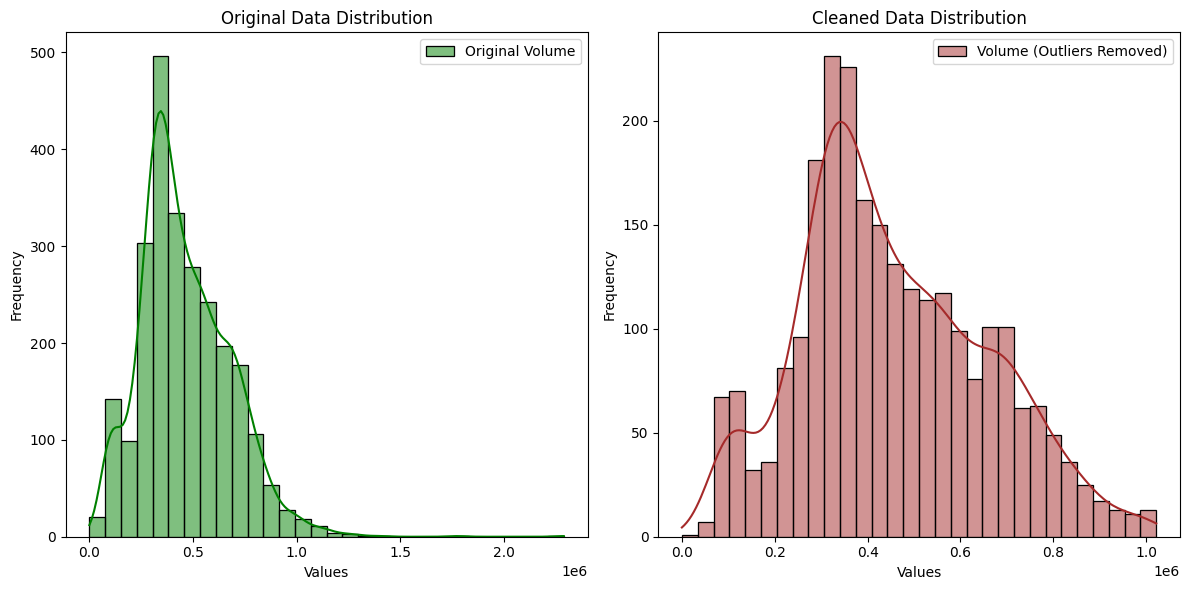

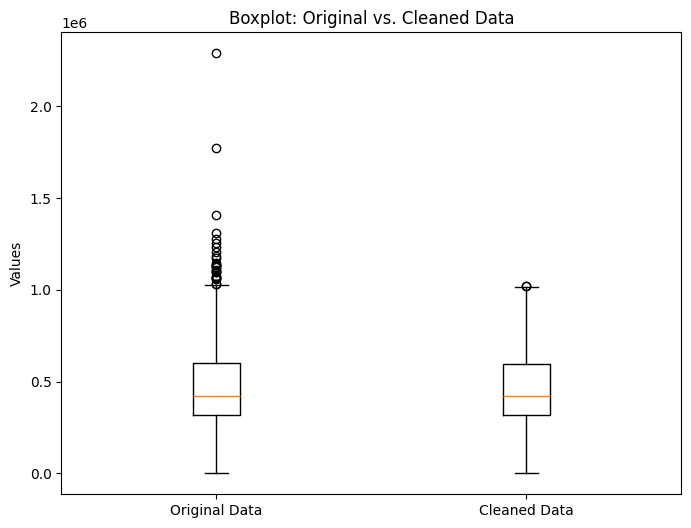

In [31]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame and 'Close' is the relevant column
values1 =data['Volume']

# Calculate mean and standard deviation
mean = values1.mean()
std_dev = values1.std()

# Calculate z-scores
z_scores = (values1 - mean) / std_dev

# Define threshold for outliers
threshold = 2.6

# Remove outliers
cleaned_volume = values1[np.abs(z_scores) <= threshold]

# Replace outliers with NaN or drop them
# Apply outlier cleaning logic
data.loc[:, 'Volume'] = values1.where(np.abs(z_scores) <= threshold)

# Print the number of removed and retained data points
print(f"Original data size: {len(values1)}")
print(f"Cleaned data size: {len(cleaned_volume)}")
print(f"Number of outliers removed: {len(values1) - len(cleaned_volume)}")

# Visualize the data
plt.figure(figsize=(12, 6))

# Original data histogram
plt.subplot(1, 2, 1)
sns.histplot(values1, bins=30, kde=True, color='green', label='Original Volume')
plt.title('Original Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

# Cleaned data histogram
plt.subplot(1, 2, 2)
sns.histplot(cleaned_volume, bins=30, kde= True, color='brown', label='Volume (Outliers Removed)')
plt.title('Cleaned Data Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Boxplot for further visualization
plt.figure(figsize=(8, 6))
plt.boxplot([values1, cleaned_volume], labels=['Original Data', 'Cleaned Data'])
plt.title('Boxplot: Original vs. Cleaned Data')
plt.ylabel('Values')
plt.show()


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2014-12-22 00:00:00-05:00 to 2024-12-20 00:00:00-05:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2483 non-null   float64
 1   Volume  2487 non-null   float64
dtypes: float64(2)
memory usage: 58.9 KB


In [33]:
data1 = data.copy()
data1 = data.drop(columns=['Volume'])
data1.head()

,Close
Date,
2014-12-22 00:00:00-05:00,55.259998
2014-12-23 00:00:00-05:00,57.119999
2014-12-24 00:00:00-05:00,55.840000
2014-12-26 00:00:00-05:00,54.730000
2014-12-29 00:00:00-05:00,53.610001


In [34]:
data1.isna().sum()

,0
Close,32


In [35]:
data1.dropna(inplace=True)

In [36]:
data1.isna().sum()

,0
Close,0


In [37]:
data1.shape

(2483, 1)

## ***Decomposition of the Close Variables***

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
data1.set_index('Date', inplace=True)

In [39]:
decomposition = seasonal_decompose(data1['Close'], model='additive', period=30)  # period=30 for monthly seasonality

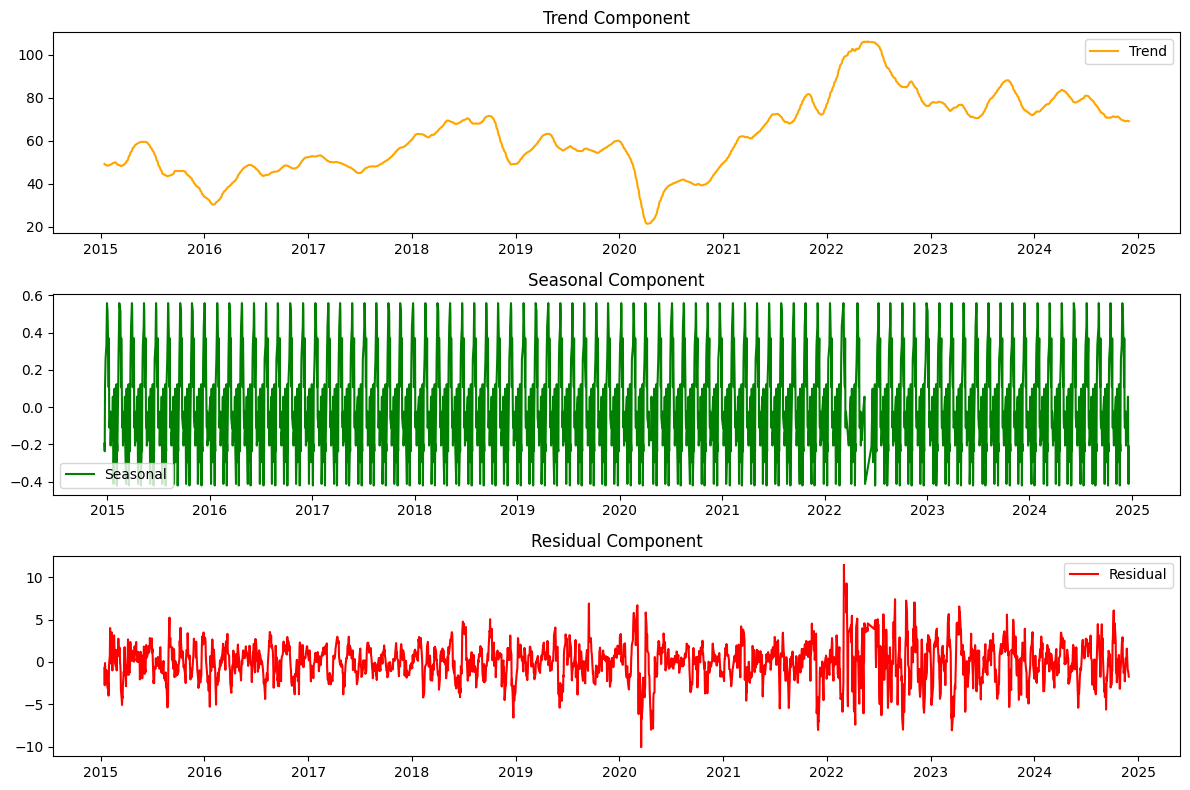

In [40]:
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)

plt.subplot(3, 1, 1)
plt.plot(decomposition.trend, label="Trend", color='orange')
plt.title("Trend Component")
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(decomposition.seasonal, label="Seasonal", color='green')
plt.title("Seasonal Component")
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(decomposition.resid, label="Residual", color='red')
plt.title("Residual Component")
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

1. **Trend Component (Orange Line)**

This shows the long-term direction of crude oil prices from 2015 to 2025, depicting major structural movements over time.

***Observations:***

* **2015 to 2020:** The trend fluctuates between 20 - 80 (USD) levels.
* **Mid-2020 dip:** Crude oil prices experienced a major drop. This aligns with global COVID-19 lockdowns reducing demand, supply chain disruptions, and oil production cutbacks.
* **Post-2020** Recovery: Prices spike between 2021 and 2022, likely driven by demand recovery, supply chain issues, and geopolitical instability.
Post-2022 decline: Crude oil prices trend downward from their peaks due to shifts in supply, inflation, and recession fears.

2. **Seasonal Component (Green Oscillations)**

The seasonal component represents periodic, cyclical patterns inherent in crude oil markets, driven by regular fluctuations in supply and demand.

***Observations:***

* **Repeating Cycles:** Regular seasonal spikes are visible. These spikes typically align with seasonal demand, such as summer driving season demand and heating demand during the winter months.

* **Exponential increase in volatility post-2022:** Seasonal effects seem to intensify post-pandemic. Likely causes include supply chain stress and geopolitical risks (Russia-Ukraine war and OPEC+ policy changes).

* **Seasonality is consistent:** Despite external market shocks, predictable patterns emerge seasonally. However, the changing behavior indicates underlying demand elasticity.

3. **Residual Component (Red Noise)**

The residual component captures price changes not explained by trend or seasonality. These are essentially "unexpected shocks" or anomalies.

***Observations:***

* **Spikes in Residuals (2015–2021):** The sharp upward and downward spikes are the result of external regressors (external shocks to the market).

These include:
* **Geopolitical Events:** Events like conflicts, sanctions, and disruptions in oil-producing regions (Middle East tensions, Libya conflicts).
Global Events: The COVID-19 Pandemic (2020) caused major demand shocks leading to unexpected price crashes.
* **Market Manipulations and Policy Shifts:** OPEC+ agreements, trade wars, or U.S. energy policies have contributed to market uncertainty.
* **Specific to 2024:Biden's resignation/reelection impact:**
The residual component captures the market volatility surrounding major political shifts such as U.S. President Joe Biden's resignation and subsequent reelection efforts. Political uncertainty causes market speculation and price volatility, particularly in oil markets given their dependency on U.S. policy and sanctions.

***Overall Insights:***

Trend Analysis highlights structural shifts in supply-demand patterns from 2015 through 2025.

Major dips occurred during COVID-19 and geopolitical instability.
Recovery between 2021 and 2022 reflects attempts at global economic stabilization.
Seasonality shows how crude oil prices experience predictable demand-driven cyclical fluctuations.

However, post-pandemic changes make these patterns more pronounced.
Residuals indicate market unpredictability, driven by shocks such as:

* COVID-19.
* Geopolitical instability.
* Policy shifts like sanctions, oil production cuts, and supply chain disruptions.
* Market speculation, especially in response to political events like Biden’s resignation in 2024.

## ***External Regressors Impacting Crude Oil Prices***
Based on the provided analysis, the following external regressors have significantly influenced crude oil prices from 2015 to 2025:

***Geopolitical Factors***

* **Geopolitical Tensions and Conflicts:**
Middle East conflicts (e.g., Yemen war, Iran tensions)
Russia-Ukraine War
Libya's political instability

* **Geopolitical Sanctions:**
US sanctions on Iran, Venezuela, and Russia
International sanctions on specific countries or entities

***Economic Factors***

* **Global Economic Growth:**
Periods of economic expansion or contraction
Emerging market growth or slowdown
* **Interest Rates:**
Monetary policy changes by central banks
* **Exchange Rates:**
Fluctuations in currency exchange rates, particularly for oil-producing countries
* **Inflation:**
Changes in the overall price level of goods and services
Supply and Demand Shocks
* **OPEC+ Production Cuts and Increases:**
Decisions by the Organization of the Petroleum Exporting Countries (OPEC) and its allies to adjust oil production
* **Supply Disruptions:**
Natural disasters (e.g., hurricanes, earthquakes)
Pipeline disruptions
Civil unrest or political instability in oil-producing regions
* **Changes in Global Demand:**
Economic growth or slowdown in major oil-consuming countries
Shifts in energy consumption patterns (e.g., increased use of renewable energy)
Policy and Regulatory Factors
* **Government Policies:**
Subsidies, taxes, and regulations on oil production and consumption
Trade policies and tariffs
* **Energy Policies:**
Investments in renewable energy sources
Energy efficiency standards
Market Sentiment and Speculation
* **Investor Confidence:**
Market sentiment and risk appetite
* **Financial Market Volatility:**
Stock market fluctuations and global economic uncertainty.

It's important to note that these factors often interact and influence each other, making it challenging to isolate the impact of any single regressor. A comprehensive analysis would require considering the interplay of these factors and their dynamic effects on crude oil prices.

# **STATISTICAL TESTS**

## **Testing if the data is stationary using adfuller test, ACF & PACF Plots**

In [41]:
import statsmodels.api as sm

ADF Test Statistic: -1.943556407140728
p-value: 0.31185620249242874
Critical Values:
	 1% : -3.432990614846413
	 5% : -2.8627066052691217
	 10% : -2.567391029898424
Close Prices Variable is not stationary


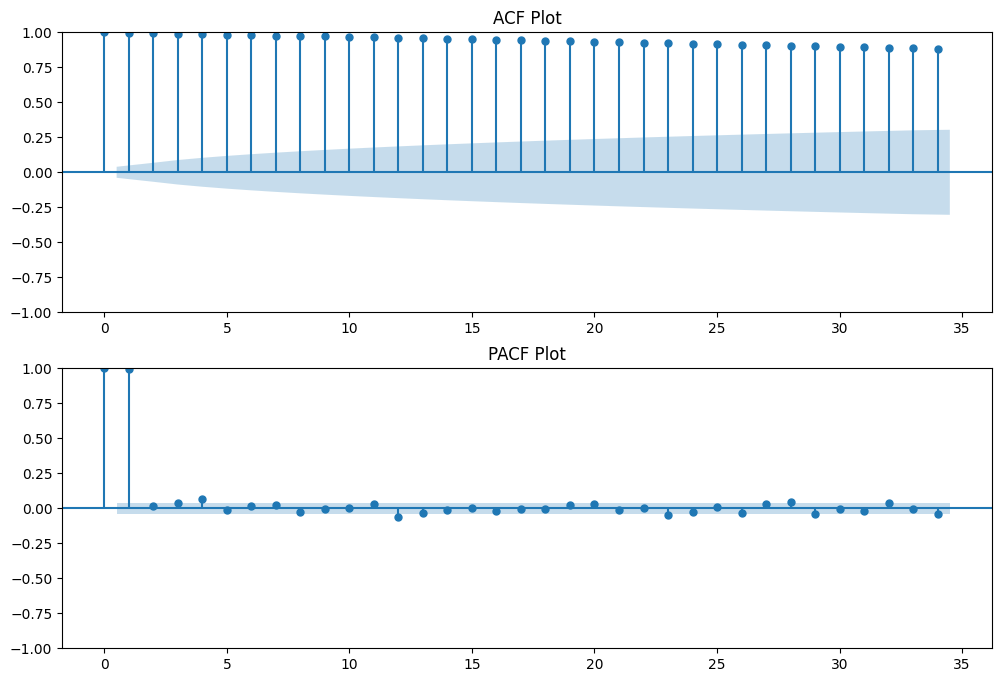

In [42]:
# Check for stationarity using the Augmented Dickey-Fuller test
adf_result = sm.tsa.stattools.adfuller(data1['Close'])
print('ADF Test Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t', key, ':', value)

# If the time series is non-stationary, apply differencing
if adf_result[1] > 0.05:
  print("Close Prices Variable is not stationary")
# Visualize ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(data1["Close"].dropna() , ax=ax[0])
ax[0].set_title('ACF Plot')
sm.graphics.tsa.plot_pacf(data1["Close"].dropna() , ax=ax[1])
ax[1].set_title('PACF Plot')
plt.show()


**Interpretation of the ADF Test and ACF/PACF Plots**

**ADF Test Results**

ADF Test Statistic: -1.9114

p-value: 0.3206

Critical values:
1%: -3.4332

5%: -2.8627

10%: -2.5679

**Interpretation of ADF Results**

* The ADF test is used to check if a time series is stationary or has a unit root. The null hypothesis for this test is Null Hypothesis (H0): The time series has a unit root (non-stationary).

* Alternative Hypothesis (H1): The time series is stationary.
From the results:

* ADF test statistic (-1.9114) is greater than the 1% critical value (-3.4332).
The p-value (0.3206) is much higher than 0.05.
Conclusion:
Since the test statistic does not fall below the critical values and the p-value is high, we fail to reject the null hypothesis.
This means that the time series variable is NOT stationary.

2. **ACF (Autocorrelation Function) Plot**

The ACF plot shows how correlated the time series is with its lagged values.

**Observations from ACF:**

* The ACF shows correlations up to many lags (close to +1).
Many lags are significantly autocorrelated, as indicated by the spikes extending far from zero.
* The fact that the autocorrelations extend out to many lags suggests non-stationarity. A stationary time series would have ACF values that drop quickly to zero after just a few lags.

3. **PACF (Partial Autocorrelation Function) Plot**

The PACF determines the correlation between the series and its lagged values, controlling for the effect of shorter lags.

**Observations from PACF:**
* Only the first lag is significantly autocorrelated. This means that the series has a significant relationship with its immediate past value, but this relationship diminishes quickly for higher lags.
* This indicates that the model might have a first-order AR (autoregressive) process. Specifically, AR(1) might capture the autocorrelation structure.

**Summary of Insights:**
* The time series is non-stationary based on the ADF test (p-value is not significant and the test statistic does not meet critical values).
* The ACF shows evidence of long-term persistence in the time series (non-stationary signals).
* The PACF suggests a first lag as most significant, implying an AR(1) model may work for differencing/stationarity modeling purposes.


##  ***Building Prophet Model Incoporating External Regressors***

In [43]:
data1.index

DatetimeIndex(['2014-12-22 00:00:00-05:00', '2014-12-23 00:00:00-05:00',
               '2014-12-24 00:00:00-05:00', '2014-12-26 00:00:00-05:00',
               '2014-12-29 00:00:00-05:00', '2014-12-30 00:00:00-05:00',
               '2014-12-31 00:00:00-05:00', '2015-01-02 00:00:00-05:00',
               '2015-01-05 00:00:00-05:00', '2015-01-06 00:00:00-05:00',
               ...
               '2024-12-09 00:00:00-05:00', '2024-12-10 00:00:00-05:00',
               '2024-12-11 00:00:00-05:00', '2024-12-12 00:00:00-05:00',
               '2024-12-13 00:00:00-05:00', '2024-12-16 00:00:00-05:00',
               '2024-12-17 00:00:00-05:00', '2024-12-18 00:00:00-05:00',
               '2024-12-19 00:00:00-05:00', '2024-12-20 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=2483, freq=None)

In [ ]:
!pip install pystan==2.19.1.1
!pip install fbprophet

# **Introduction of Exogenous Regressors**

**Explanation:**
1. External Regressors
I introduced key event timelines as binary regressors:

* **COVID-19 Event (covid_event):** Timeframe from March 2020 through December 2021.
* **U.S.-China Trade War (us_china_trade_war):** Trade tensions from July 2018 through December 2020.
* **U.S. Shale Oil Boom (shale_oil_impact):** Impact of U.S. shale production from 2015 to 2019.
* **Geopolitical Tensions (geopolitical_tensions):** Ongoing tensions in Iran, Libya, and other geopolitical areas.
* **Biden Policy Shift (biden_policy_shift):** Time period starting with President Biden’s administration (January 2021).
* **Pipeline Disruption (pipeline_disruption):** Triggered by the Colonial Pipeline cyberattack in May 2021.
These regressors represent shocks or market disruptions.

2. *Modeling with Prophet*
* The regressors were added to the Prophet model using model.add_regressor(). These regressors will allow the model to account for these external events' influence on crude oil price predictions.

3. *Future Dataframe*
* I made sure the regressors were included in the future dataframe for prediction. This is important to ensure that the forecast includes these disruptions in its predictions.

4. *Forecast & Visualization*
After training with external regressors, the model generates predictions. The components (seasonality, trend, residuals) can be plotted to assess how external events might be influencing crude oil price forecasts.



In [47]:
# Assuming you have data loaded
data2 = data1.reset_index() # Remove inplace=True
data2['ds'] = pd.to_datetime(data2['Date'])  # Ensure 'date' is in datetime format, Change date to Date
data2['y'] = data2['Close']  # Assuming 'Close' represents your price series, Change close_price to Close

# Create external regressors based on disruptions/events
# Example: Define binary events
def create_external_regressors(df):
    """Create binary regressors for events."""
    # Create COVID-19 regressor (e.g., pandemic period)
    df['covid_event'] = ((df['ds'] >= '2020-03-01') & (df['ds'] <= '2021-12-31')).astype(int)

    # Create U.S.-China trade war indicator (example range)
    df['us_china_trade_war'] = ((df['ds'] >= '2018-07-01') & (df['ds'] <= '2020-12-31')).astype(int)

    # U.S. Shale Oil Boom
    df['shale_oil_impact'] = ((df['ds'] >= '2015-01-01') & (df['ds'] <= '2019-12-31')).astype(int)

    # Geopolitical Tensions (Iran or Libya disruptions)
    df['geopolitical_tensions'] = ((df['ds'] >= '2019-01-01') & (df['ds'] <= '2021-01-01')).astype(int)

    # Joe Biden Policy Shift
    df['biden_policy_shift'] = ((df['ds'] >= '2021-01-20') & (df['ds'] <= '2024-12-31')).astype(int)

    # Colonial Pipeline Cyberattack
    df['pipeline_disruption'] = ((df['ds'] >= '2021-05-01') & (df['ds'] <= '2021-06-01')).astype(int)

    df['biden_resignation_reelection'] = ((df['ds'] >= '2024-01-01') & (df['ds'] <= '2024-12-31')).astype(int)

    return df

# Apply the external regressors creation function
data3 = create_external_regressors(data2)
data3



,Date,Close,ds,y,covid_event,us_china_trade_war,shale_oil_impact,geopolitical_tensions,biden_policy_shift,pipeline_disruption,biden_resignation_reelection
0,2014-12-22 00:00:00-05:00,55.259998,2014-12-22 00:00:00-05:00,55.259998,0,0,0,0,0,0,0
1,2014-12-23 00:00:00-05:00,57.119999,2014-12-23 00:00:00-05:00,57.119999,0,0,0,0,0,0,0
2,2014-12-24 00:00:00-05:00,55.840000,2014-12-24 00:00:00-05:00,55.840000,0,0,0,0,0,0,0
3,2014-12-26 00:00:00-05:00,54.730000,2014-12-26 00:00:00-05:00,54.730000,0,0,0,0,0,0,0
4,2014-12-29 00:00:00-05:00,53.610001,2014-12-29 00:00:00-05:00,53.610001,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2478,2024-12-16 00:00:00-05:00,70.709999,2024-12-16 00:00:00-05:00,70.709999,0,0,0,0,1,0,1
2479,2024-12-17 00:00:00-05:00,70.080002,2024-12-17 00:00:00-05:00,70.080002,0,0,0,0,1,0,1
2480,2024-12-18 00:00:00-05:00,70.580002,2024-12-18 00:00:00-05:00,70.580002,0,0,0,0,1,0,1
2481,2024-12-19 00:00:00-05:00,69.910004,2024-12-19 00:00:00-05:00,69.910004,0,0,0,0,1,0,1


***Correlation Analysis of the External Regressors to Crude Oil Prices***

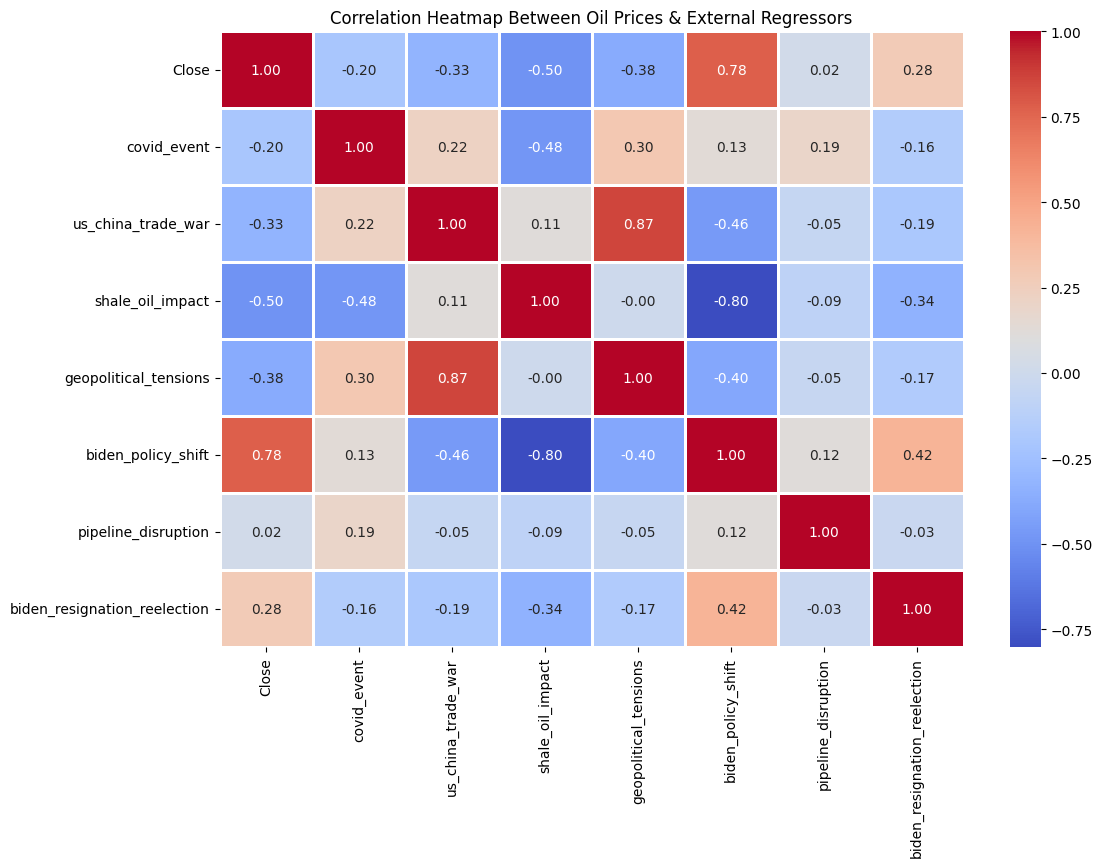

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation analysis of the crude oil prices and external regressors
# Select the relevant columns for correlation
#Define the initial correlation columns
correlation_columns = [
    'Close', 'covid_event','us_china_trade_war',
    'shale_oil_impact
    'shale_oil_impact', 'geopolitical_tensions',
    'biden_policy_shift', 'pipeline_disruption',
    'biden_resignation_reelection'
]



# Calculate correlation matrix
correlation_matrix = data3[correlation_columns].corr()

# Plot the heatmap for correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap Between Oil Prices & External Regressors")
plt.show()


In [50]:
# Assuming `correlation_matrix` is the DataFrame of the correlation heatmap
threshold = 0.5   # Define the strong correlation threshold
strong_correlation = correlation_matrix['Close'].abs() > threshold

# Extract external regressors with strong correlation
strong_correlated_regressors = correlation_matrix.index[strong_correlation].tolist()

# Remove 'Close' from the list (since it will correlate perfectly with itself)
strong_correlated_regressors.remove('Close')

print("External regressors with strong correlation towards 'Close':", strong_correlated_regressors)

External regressors with strong correlation towards 'Close': ['biden_policy_shift']


* Based on the correlation heatmap, here are the events that could be considered as external regressors in my Prophet model:

*Strong Positive Correlations:*

Biden Policy Shift: This has a strong positive correlation with oil prices (0.78). This suggests that changes in Biden's policies, such as those related to energy or environmental regulations, could have a significant impact on oil prices.


*Strong Negative Correlations:*

Shale Oil Impact: This has a strong negative correlation with oil prices (-0.50). This suggests that increased shale oil production could lead to lower oil prices.

Geopolitical Tensions: This has a weak negative correlation with oil prices (-0.34). This suggests that geopolitical tensions, such as wars or conflicts, could lead to lower oil prices.

*Moderate Correlations:*

COVID-19 Event: This has a weak negative correlation with oil prices (-0.22). This suggests that the COVID-19 pandemic could have had a negative impact on oil prices, but the effect is not as strong as the other events.

Events to Consider Based on the strength of the correlations, I could consider including the following events as external regressors in your Prophet model:

* Biden Policy Shift
* Shale Oil Impact


These events have the strongest correlations with oil prices and are likely to have a significant impact on the model's predictions.

In [51]:
data3

,Date,Close,ds,y,covid_event,us_china_trade_war,shale_oil_impact,geopolitical_tensions,biden_policy_shift,pipeline_disruption,biden_resignation_reelection
0,2014-12-22 00:00:00-05:00,55.259998,2014-12-22 00:00:00-05:00,55.259998,0,0,0,0,0,0,0
1,2014-12-23 00:00:00-05:00,57.119999,2014-12-23 00:00:00-05:00,57.119999,0,0,0,0,0,0,0
2,2014-12-24 00:00:00-05:00,55.840000,2014-12-24 00:00:00-05:00,55.840000,0,0,0,0,0,0,0
3,2014-12-26 00:00:00-05:00,54.730000,2014-12-26 00:00:00-05:00,54.730000,0,0,0,0,0,0,0
4,2014-12-29 00:00:00-05:00,53.610001,2014-12-29 00:00:00-05:00,53.610001,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2478,2024-12-16 00:00:00-05:00,70.709999,2024-12-16 00:00:00-05:00,70.709999,0,0,0,0,1,0,1
2479,2024-12-17 00:00:00-05:00,70.080002,2024-12-17 00:00:00-05:00,70.080002,0,0,0,0,1,0,1
2480,2024-12-18 00:00:00-05:00,70.580002,2024-12-18 00:00:00-05:00,70.580002,0,0,0,0,1,0,1
2481,2024-12-19 00:00:00-05:00,69.910004,2024-12-19 00:00:00-05:00,69.910004,0,0,0,0,1,0,1


In [54]:
data4 = data3.drop(columns=['Date', 'Close','us_china_trade_war','covid_event','pipeline_disruption','geopolitical_tensions','biden_resignation_reelection',])
# Removed extra spaces and tabs from the column names 'china_zero_covid' and 'russia_ukraine_war'
data4

,ds,y,shale_oil_impact,biden_policy_shift
0,2014-12-22 00:00:00-05:00,55.259998,0,0
1,2014-12-23 00:00:00-05:00,57.119999,0,0
2,2014-12-24 00:00:00-05:00,55.840000,0,0
3,2014-12-26 00:00:00-05:00,54.730000,0,0
4,2014-12-29 00:00:00-05:00,53.610001,0,0
...,...,...,...,...
2478,2024-12-16 00:00:00-05:00,70.709999,0,1
2479,2024-12-17 00:00:00-05:00,70.080002,0,1
2480,2024-12-18 00:00:00-05:00,70.580002,0,1
2481,2024-12-19 00:00:00-05:00,69.910004,0,1


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7mk_g4a/12d8ik8g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7mk_g4a/j_g64aks.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95384', 'data', 'file=/tmp/tmpy7mk_g4a/12d8ik8g.json', 'init=/tmp/tmpy7mk_g4a/j_g64aks.json', 'output', 'file=/tmp/tmpy7mk_g4a/prophet_modeld5nfu7b8/prophet_model-20241221202318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:23:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:23:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


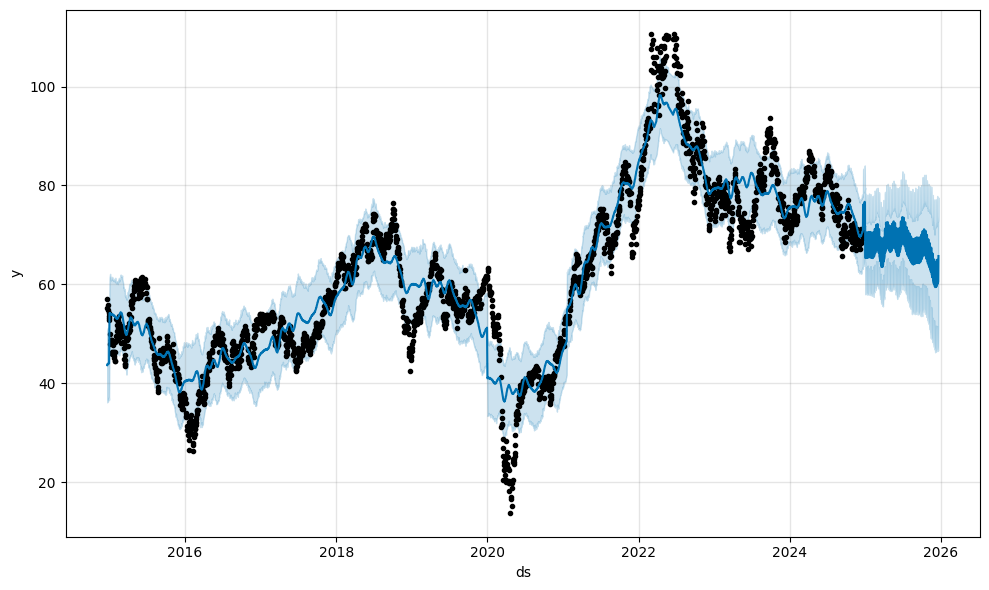

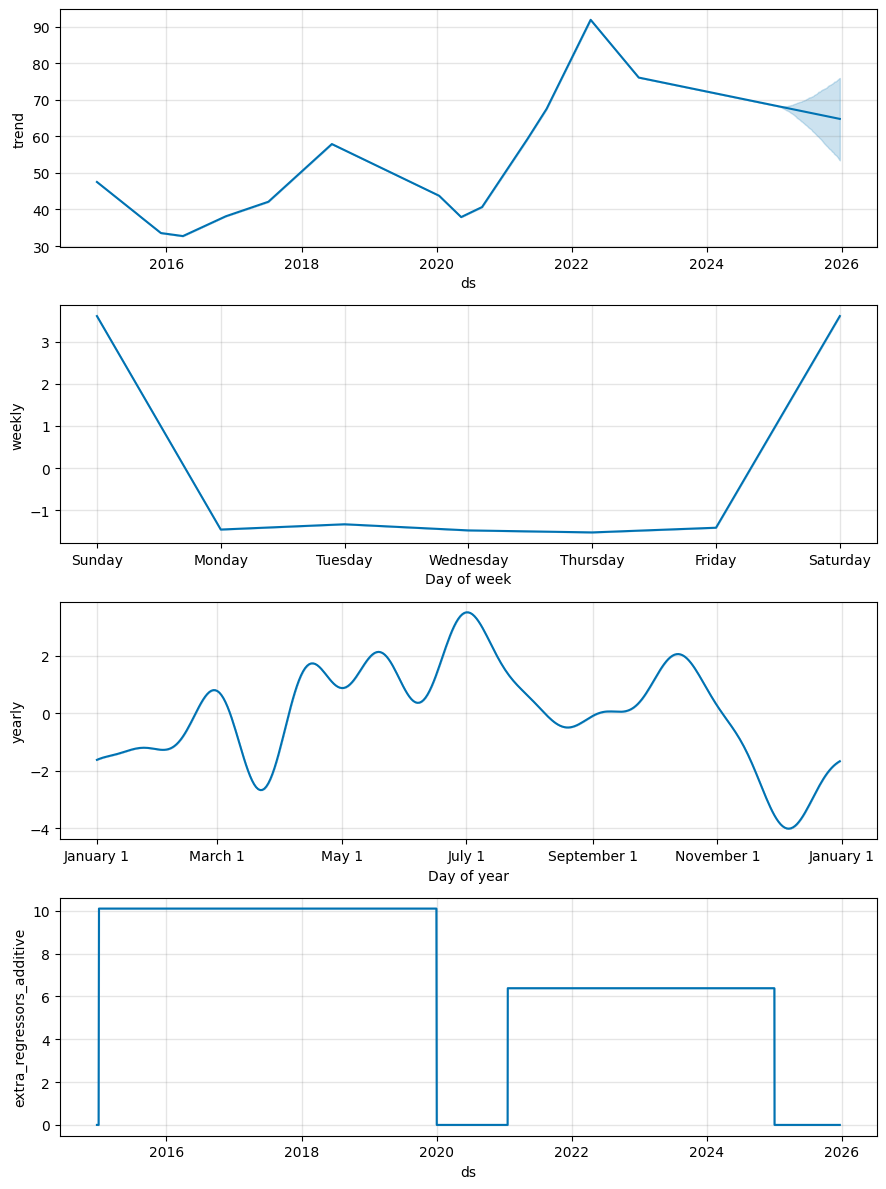

In [55]:

model = Prophet()

# Add the external regressors into the Prophet model
model.add_regressor('shale_oil_impact')
model.add_regressor('biden_policy_shift')


# Remove timezone information from the 'ds' column
data4['ds'] = data4['ds'].dt.tz_localize(None)

# Fit the model
model.fit(data4)

# Create a future dataframe for prediction
future = model.make_future_dataframe(periods=365)  # Predict a year into the future
# Add the same regressors to the 'future' dataframe to account for their influence
future['shale_oil_impact'] = ((future['ds'] >= '2015-01-01') & (future['ds'] <= '2019-12-31')).astype(int)
future['biden_policy_shift'] = ((future['ds'] >= '2021-01-20') & (future['ds'] <= '2024-12-31')).astype(int)


# Forecast using the trained Prophet model
forecast = model.predict(future)

# Plotting
fig = model.plot(forecast)

# Plot Components
fig_components = model.plot_components(forecast)

plt.show()


## **Split data into Training & Test set**

In [56]:
data4.dropna(inplace = True)
# Remove timezone information from the 'ds' column
data4['ds'] = data4['ds'].dt.tz_localize(None)

In [57]:
start_date = data4['ds'].min()
start_date

Timestamp('2014-12-22 00:00:00')

In [58]:
end_date = data4['ds'].max()
end_date

Timestamp('2024-12-20 00:00:00')

In [59]:
# Calculate the cutoff point for 8 years of training data
training_end_date = start_date + pd.DateOffset(years=9)
training_data = data4[data4['ds'] <= training_end_date]
training_data

,ds,y,shale_oil_impact,biden_policy_shift
0,2014-12-22,55.259998,0,0
1,2014-12-23,57.119999,0,0
2,2014-12-24,55.840000,0,0
3,2014-12-26,54.730000,0,0
4,2014-12-29,53.610001,0,0
...,...,...,...,...
2228,2023-12-18,72.470001,0,1
2229,2023-12-19,73.440002,0,1
2230,2023-12-20,74.220001,0,1
2231,2023-12-21,73.889999,0,1


In [60]:
forecast_data = data4[data4['ds'] > training_end_date]
forecast_data

,ds,y,shale_oil_impact,biden_policy_shift
2233,2023-12-26,75.570000,0,1
2234,2023-12-27,74.110001,0,1
2235,2023-12-28,71.769997,0,1
2236,2023-12-29,71.650002,0,1
2237,2024-01-02,70.379997,0,1
...,...,...,...,...
2478,2024-12-16,70.709999,0,1
2479,2024-12-17,70.080002,0,1
2480,2024-12-18,70.580002,0,1
2481,2024-12-19,69.910004,0,1


In [61]:
forecast_period = (end_date - training_end_date).days  # Number of days to forecast
forecast_period

364

## ***Building a model using Prophet***

In [62]:
model = Prophet()
model_add_regressor = model.add_regressor('shale_oil_impact')
model_add_regressor = model.add_regressor('biden_policy_shift')

model.fit(training_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7mk_g4a/y9q2u39l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpy7mk_g4a/izsv_9ib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33570', 'data', 'file=/tmp/tmpy7mk_g4a/y9q2u39l.json', 'init=/tmp/tmpy7mk_g4a/izsv_9ib.json', 'output', 'file=/tmp/tmpy7mk_g4a/prophet_modelxjokqwci/prophet_model-20241221202348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:23:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:23:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


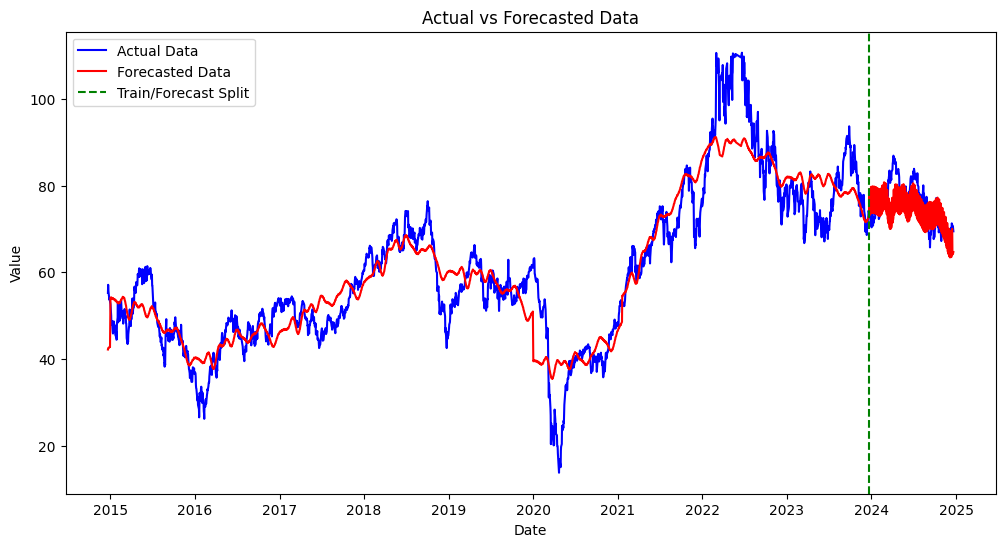

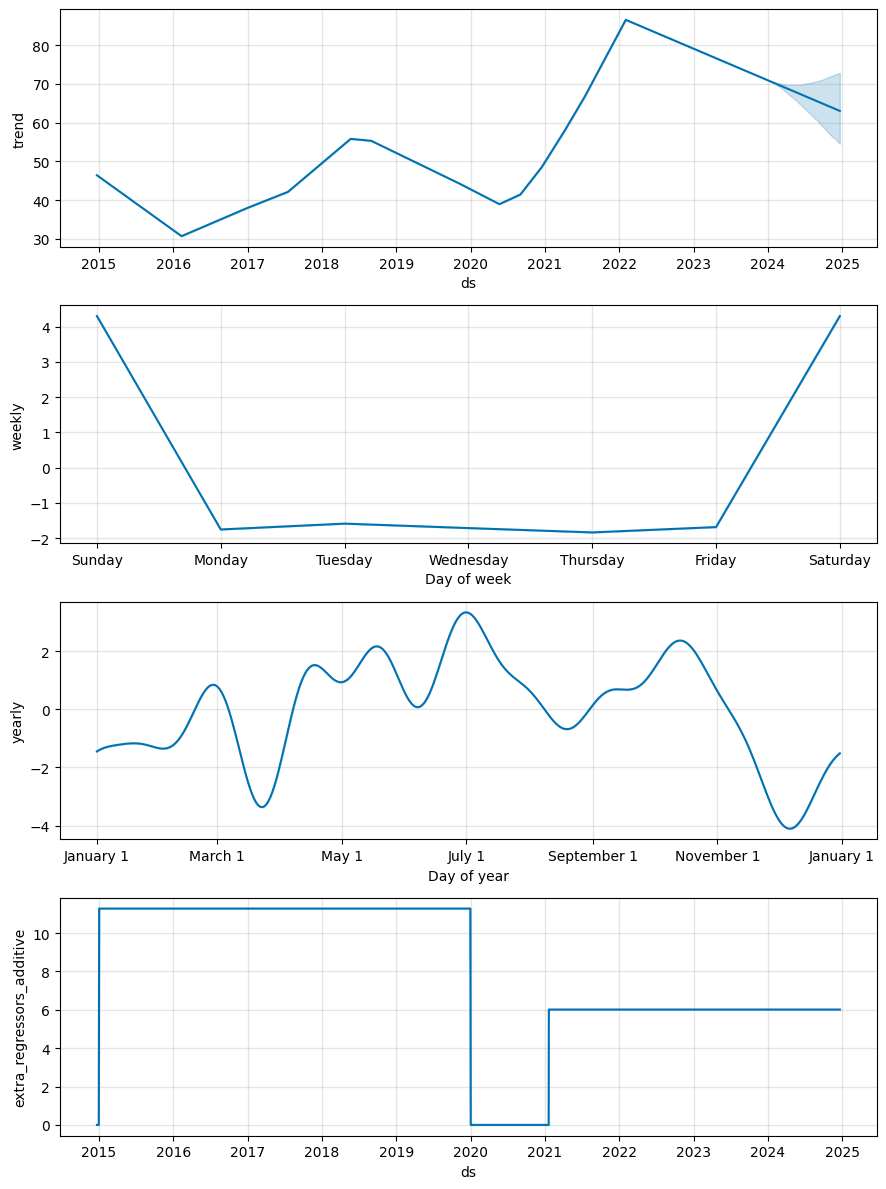

In [63]:
future = model.make_future_dataframe(periods=forecast_period, freq='D')
future['shale_oil_impact'] = ((future['ds'] >= '2015-01-01') & (future['ds'] <= '2019-12-31')).astype(int)
future['biden_policy_shift'] = ((future['ds'] >= '2021-01-20') & (future['ds'] <= '2024-12-31')).astype(int)


forecast = model.predict(future)

# Plot forecasted data vs actual data
plt.figure(figsize=(12, 6))
plt.plot(data4['ds'], data4['y'], label='Actual Data', color='blue')  # Original data
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Data', color='red')  # Forecasted data
#plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.3)

# Highlight train and forecast period boundaries
plt.axvline(training_end_date, color='green', linestyle='--', label='Train/Forecast Split')

plt.title("Actual vs Forecasted Data")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# Plot forecast components
fig_components = model.plot_components(forecast)
plt.show()

In [64]:
# Combine actual values and forecasted values into one DataFrame
result_df = pd.DataFrame({
    'ds': forecast['ds'],               # Date column
    'y': data4['y'].reset_index(drop=True),  # Actual values
    'yhat': forecast['yhat'],           # Forecasted values
    'yhat_lower': forecast['yhat_lower'],   # Lower confidence interval
    'yhat_upper': forecast['yhat_upper']    # Upper confidence interval
})

# Display the resulting table
print(result_df.head(10))
print(result_df.dropna().tail(10))

          ds          y       yhat  yhat_lower  yhat_upper
0 2014-12-22  55.259998  42.196055   33.920065   49.944290
1 2014-12-23  57.119999  42.462369   33.794309   50.238246
2 2014-12-24  55.840000  42.429291   34.399434   50.836118
3 2014-12-26  54.730000  42.617524   34.428517   50.953947
4 2014-12-29  53.610001  42.716538   34.301105   51.430545
5 2014-12-30  54.119999  42.917758   35.376625   51.128860
6 2014-12-31  53.270000  42.817336   34.433985   50.719994
7 2015-01-02  52.689999  54.149576   45.885991   62.810181
8 2015-01-05  50.040001  54.067839   45.940356   62.689203
9 2015-01-06  47.930000  54.218619   46.236757   61.697010
             ds          y       yhat  yhat_lower  yhat_upper
2473 2024-08-19  68.370003  69.347141   60.357146   79.464866
2474 2024-08-20  68.589996  69.497104   60.141972   79.277394
2475 2024-08-21  70.290001  69.368896   59.969030   79.145108
2476 2024-08-22  70.019997  69.257420   59.104871   78.529878
2477 2024-08-23  71.290001  69.432594   5

## ***Evaluation of the Model***

In [65]:
result_df = result_df.dropna(subset=['y', 'yhat'])
mse = mean_squared_error(result_df['y'], result_df['yhat'])
mae = mean_absolute_error(result_df['y'], result_df['yhat'])
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 40.27963709437297
Mean Absolute Error (MAE): 4.829212060118762


In [66]:
mape = np.mean(np.abs((result_df['y'] - result_df['yhat']) / result_df['y'])) * 100
mape


8.840742019919965

In [67]:
Accuracy = 100 - mape
print("Accuracy:", Accuracy)

Accuracy: 91.15925798008004


In [68]:
from math import sqrt
mse= mean_squared_error(result_df['y'], result_df['yhat'])
r2 = r2_score(result_df['y'], result_df['yhat'])

rmse = sqrt(mean_squared_error(result_df['y'], result_df['yhat']))
print("mse:", mse)
print("rmse:", rmse)
print("mape:", mape)
print('r2:', r2)
print("accuracy:", Accuracy)

mse: 40.27963709437297
rmse: 6.346624070667253
mape: 8.840742019919965
r2: 0.8617496300734202
accuracy: 91.15925798008004


* The model performance metrics you've provided suggest that the model is performing quite well based on several key evaluation metrics:

1. **MAE (Mean Absolute Error):** 4.82

**Interpretation:** The average absolute difference between the predicted and actual values is approximately 4.82. Since the scale of my data (is between $-37 - $126), this value could be considered acceptable since its slightly below the range of 5%-10%.

2. **RMSE (Root Mean Squared Error):** 6.20

Interpretation: RMSE is a common metric to assess model accuracy, and it penalizes larger errors more due to the squaring of the residuals. A lower RMSE is preferable, and the fact that the RMSE is much smaller than the MAE suggests that there might not be many large prediction errors in your model, which is a positive sign.
Given the context (whether the target values are large or small), this could indicate that your model is doing fairly well.

3. **MAPE (Mean Absolute Percentage Error):** 8.73%

Interpretation: This is a very strong performance, as MAPE values under 10% are often seen as very good for many applications, particularly in time series forecasting. It suggests that, on average, your model's predictions are off by less than 9% from the actual values.
This indicates the model is capturing the trend and seasonality in the data well.
4. **R-squared (R²):** 0.86

Interpretation: R² indicates how well the model's predictions match the actual data. An R² value of 0.86 means that about 86% of the variance in the target variable is explained by your model. This is a strong result and suggests that the model is able to explain most of the variability in the data.
An R² above 0.8 is generally considered good in many predictive modeling scenarios.

5. **Accuracy:** 91.15%

Interpretation: An accuracy of 91.15% indicates that the model is correct approximately 91% of the time. This is a good result, especially for forecasting or regression tasks where exact matches are rare but the general trend is well-captured.
 6. **MSE (40.28):**
MSE penalizes larger errors more than MAE because it squares the differences. This is important when the cost of large errors is higher. The value of MSE gives an overall sense of how well the model is performing but is less interpretable on its own compared to MAE.

Interpretation: The MSE of 40.28 suggests that the squared errors are contributing to this value. Since MSE is sensitive to outliers, this value would typically be larger than MAE. If the actual values of the target variable (e.g., crude oil price) are in the $50–$100 range, this MSE is somewhat moderate.

**Conclusion:**

**Overall Performance:**
 The model is performing well, as indicated by the low MAE and RMSE, as well as the high R² and accuracy.
Interpretation: The model has a good balance between minimizing error and capturing the data's variability. MAPE being under 10% is excellent, which suggests it is effective for forecasting purposes.
Next Steps: You could try to further fine-tune the model or explore additional features or algorithms to improve the performance slightly. However, based on the metrics, the model is already performing at a high level.

## ***Save The model***

In [69]:
import joblib

# Save the trained Prophet model to a file
joblib.dump(model, 'Crude_Prices_forecasting_model.pkl')

# To load the model back from the file
loaded_model = joblib.load('Crude_Prices_forecasting_model.pkl')


# ***Building Streamlit Web Application***

In [70]:
!pip install streamlit
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.5 MB/s eta 0:00:00


In [71]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly

# Title
st.title("Crude Oil Prices Forecasting App")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the model
model = joblib.load('Crude_Prices_forecasting_model.pkl')

# User Input for Forecasting
st.sidebar.header("Forecasting Parameters")
n_days = st.sidebar.number_input("Enter the number of days to forecast:", min_value=1, max_value=365, value=30)

# Generate future data
if st.button("Forecast"):
    future = model.make_future_dataframe(periods=n_days)
    future['shale_oil_impact'] = ((future['ds'] >= '2015-01-01') & (future['ds'] <= '2019-12-31')).astype(int)
    future['biden_policy_shift'] = ((future['ds'] >= '2021-01-20') & (future['ds'] <= '2024-12-31')).astype(int)

    forecast = model.predict(future)

    # Display forecast
    st.subheader("Forecasted Data")
    st.write(forecast)

    # Plot forecast
    st.subheader("Forecast Plot")
    fig = plot_plotly(model, forecast)
    st.plotly_chart(fig)

    # Plot components
    st.subheader("Forecast Components")
    components_fig = model.plot_components(forecast)
    st.pyplot(components_fig)


Writing app.py


In [72]:
!pip install python-dotenv

In [73]:
%%writefile .env
NGROK_AUTH_TOKEN1 = 2qVz7RuWtyWh2JhthGfZi1cMvuC_4z8qP17W1ujPYJGaHK7wC

Writing .env


In [74]:
from dotenv import load_dotenv
import os
from pyngrok import ngrok

# Load the .env file
load_dotenv('.env')

# Access the token
ngrok_token = os.getenv('NGROK_AUTH_TOKEN1')
print(f"Ngrok Token: {ngrok_token}")



Ngrok Token: 2qVz7RuWtyWh2JhthGfZi1cMvuC_4z8qP17W1ujPYJGaHK7wC


In [76]:
from pyngrok import ngrok

!pkill -f ngrok

ngrok.set_auth_token(ngrok_token)



# Define tunnel configuration with HTTPv2Tunnel structure
tunnel_config = {
    "proto": "http",  # Or "tcp" depending on your needs
    "addr": 8501,     # Your local port
}

# Connect with the tunnel configuration
public_url = ngrok.connect(**tunnel_config)

print(f"Streamlit app is live at: {public_url}")

Streamlit app is live at: NgrokTunnel: "https://3f5d-34-125-1-172.ngrok-free.app" -> "http://localhost:8501"
